<a href="https://colab.research.google.com/github/sitbayevalibek/sertifikat-uchun-topshiriqlar/blob/main/avia_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn import metrics


In [3]:
sample_submission = pd.read_csv('/content/sample_submission.csv')
test = pd.read_csv('/content/test_dataset.csv', index_col=0)
train = pd.read_csv('/content/train_dataset.csv', index_col=0)

In [17]:
sample_submission

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
3995,3996,0
3996,3997,0
3997,3998,0
3998,3999,0


train va test larda NaN qiymatlari to'ldirish

In [4]:
train['Arrival Delay in Minutes'].fillna(train['Arrival Delay in Minutes'].median(), inplace=True)

In [5]:
test['Arrival Delay in Minutes'].fillna(test['Arrival Delay in Minutes'].median(), inplace=True)

In [6]:

num_attribs=['Age', 'Flight Distance',	'Inflight wifi service',	'Departure/Arrival time convenient',
             'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
             'Inflight entertainment',	'On-board service',	'Leg room service',	'Baggage handling',	'Checkin service',
             'Inflight service',	'Cleanliness',	'Departure Delay in Minutes',	'Arrival Delay in Minutes'
             ]
cat_attribs=['Gender',	'Customer Type', 'Type of Travel',	'Class'	]

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [7]:
X_train=train.drop('satisfaction', axis=1)
y=train['satisfaction']


In [8]:
X_prep = full_pipeline.fit_transform(X_train)

In [9]:

x_train, x_test, y_train, y_test = train_test_split(X_prep,y, test_size=0.2, random_state=42)

In [20]:
cb_class = CatBoostClassifier()
cb_class.fit(x_train, y_train)

y_pred = cb_class.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoostClassifier Accuracy: {accuracy:.3f}")

Learning rate set to 0.025035
0:	learn: 0.6595151	total: 2.96ms	remaining: 2.96s
1:	learn: 0.6305093	total: 5.92ms	remaining: 2.95s
2:	learn: 0.6025494	total: 8.81ms	remaining: 2.93s
3:	learn: 0.5678071	total: 11.7ms	remaining: 2.92s
4:	learn: 0.5420437	total: 14.6ms	remaining: 2.9s
5:	learn: 0.5205654	total: 17.8ms	remaining: 2.94s
6:	learn: 0.5043361	total: 20.8ms	remaining: 2.95s
7:	learn: 0.4842812	total: 23.7ms	remaining: 2.94s
8:	learn: 0.4623699	total: 27.1ms	remaining: 2.98s
9:	learn: 0.4462130	total: 30.2ms	remaining: 2.99s
10:	learn: 0.4316906	total: 33.3ms	remaining: 2.99s
11:	learn: 0.4133286	total: 36.3ms	remaining: 2.99s
12:	learn: 0.4009759	total: 39.2ms	remaining: 2.98s
13:	learn: 0.3888070	total: 42.2ms	remaining: 2.97s
14:	learn: 0.3786531	total: 45ms	remaining: 2.96s
15:	learn: 0.3693567	total: 48ms	remaining: 2.95s
16:	learn: 0.3580517	total: 51ms	remaining: 2.95s
17:	learn: 0.3493287	total: 54.1ms	remaining: 2.95s
18:	learn: 0.3403914	total: 57.1ms	remaining: 2.95s

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1002
           1       0.97      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Accuracy: 0.9525


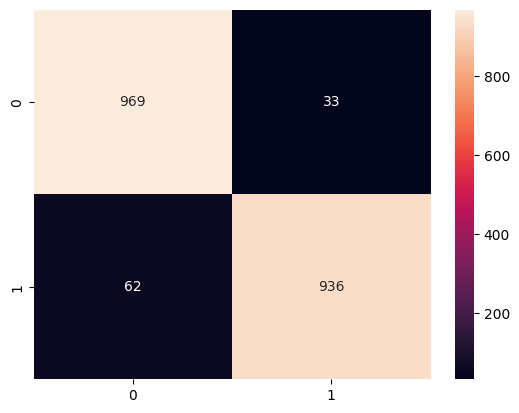

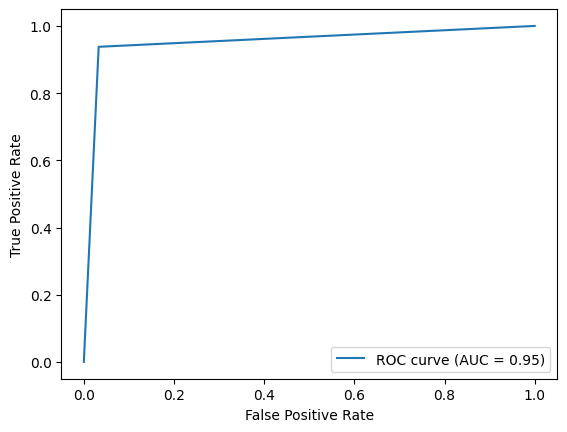

In [13]:
y_pred = cb_class.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

## Test

In [16]:
test_prep = full_pipeline.transform(test)
test_predict = cb_class.predict(test_prep)

In [18]:
sample_submission['satisfaction']=test_predict

In [19]:
sample_submission.to_csv('submission_churn.csv', index=False)